In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import operator
from pyomo import environ as pe
import os

os.environ['NEOS_EMAIL'] = 'XXXXXX@gmail.com' 


In [2]:
n=64
Xdic={}
itr=0
for i in range(1,int(sqrt(n))+1):
    for j in range(1,int(sqrt(n))+1):
        itr+=1
        Xdic[itr,'x']=i
        Xdic[itr,'y']=j
    
AllTour={}
for i in range(1,n+1):
    for j in range(1,n+1):
        if i!=j:
            AllTour[i,j]=sqrt((Xdic[i,'x']-Xdic[j,'x'])**2+(Xdic[i,'y']-Xdic[j,'y'])**2)
            
            
allowed={}

In [3]:
test={}
for cc in [-1,+1]:
    for rr in [-2,+2]:
        test[cc,rr]=1
        test[rr,cc]=1
print(test)                    
for i in range(1,n+1):
    for j in range(1,n+1):
        if i!=j:
            #print(i,j, (Xdic[i,'x']-Xdic[j,'x'],Xdic[i,'y']-Xdic[j,'y']))
            if (Xdic[i,'x']-Xdic[j,'x'],Xdic[i,'y']-Xdic[j,'y']) in test:
                allowed[i,j]=1
                allowed[j,i]=1

{(-1, -2): 1, (-2, -1): 1, (-1, 2): 1, (2, -1): 1, (1, -2): 1, (-2, 1): 1, (1, 2): 1, (2, 1): 1}


In [4]:
allowed

{(1, 11): 1,
 (11, 1): 1,
 (1, 18): 1,
 (18, 1): 1,
 (2, 12): 1,
 (12, 2): 1,
 (2, 17): 1,
 (17, 2): 1,
 (2, 19): 1,
 (19, 2): 1,
 (3, 9): 1,
 (9, 3): 1,
 (3, 13): 1,
 (13, 3): 1,
 (3, 18): 1,
 (18, 3): 1,
 (3, 20): 1,
 (20, 3): 1,
 (4, 10): 1,
 (10, 4): 1,
 (4, 14): 1,
 (14, 4): 1,
 (4, 19): 1,
 (19, 4): 1,
 (4, 21): 1,
 (21, 4): 1,
 (5, 11): 1,
 (11, 5): 1,
 (5, 15): 1,
 (15, 5): 1,
 (5, 20): 1,
 (20, 5): 1,
 (5, 22): 1,
 (22, 5): 1,
 (6, 12): 1,
 (12, 6): 1,
 (6, 16): 1,
 (16, 6): 1,
 (6, 21): 1,
 (21, 6): 1,
 (6, 23): 1,
 (23, 6): 1,
 (7, 13): 1,
 (13, 7): 1,
 (7, 22): 1,
 (22, 7): 1,
 (7, 24): 1,
 (24, 7): 1,
 (8, 14): 1,
 (14, 8): 1,
 (8, 23): 1,
 (23, 8): 1,
 (9, 19): 1,
 (19, 9): 1,
 (9, 26): 1,
 (26, 9): 1,
 (10, 20): 1,
 (20, 10): 1,
 (10, 25): 1,
 (25, 10): 1,
 (10, 27): 1,
 (27, 10): 1,
 (11, 17): 1,
 (17, 11): 1,
 (11, 21): 1,
 (21, 11): 1,
 (11, 26): 1,
 (26, 11): 1,
 (11, 28): 1,
 (28, 11): 1,
 (12, 18): 1,
 (18, 12): 1,
 (12, 22): 1,
 (22, 12): 1,
 (12, 27): 1,
 (27, 12

In [5]:
def cross(i,j,a,b):    
    m1 = (Xdic[i,'y']-Xdic[j,'y'])/(Xdic[i,'x']-Xdic[j,'x'])
    m2 = (Xdic[a,'y']-Xdic[b,'y'])/(Xdic[a,'x']-Xdic[b,'x'])
    x1,y1 = Xdic[i,'x'], Xdic[i,'y']
    x2,y2 = Xdic[a,'x'], Xdic[a,'y']

    a1,b1,c1=-m1,1, x1*m1-y1
    a2,b2,c2=-m2,1, x2*m2-y2

    if m1!=m2:        
        x0,y0 = (b1*c2-b2*c1)/(a1*b2-a2*b1) , (c1*a2-c2*a1)/(a1*b2-a2*b1)
        cond1 = min(Xdic[a,'x'],Xdic[b,'x']) <=x0<= max(Xdic[a,'x'],Xdic[b,'x'])
        cond2 = min(Xdic[a,'y'],Xdic[b,'y']) <=y0<= max(Xdic[a,'y'],Xdic[b,'y'])
        cond3 = min(Xdic[i,'x'],Xdic[j,'x']) <=x0<= max(Xdic[i,'x'],Xdic[j,'x'])
        cond4 = min(Xdic[i,'y'],Xdic[j,'y']) <=y0<= max(Xdic[i,'y'],Xdic[j,'y'])

        return (m1!=m2) and cond1 and cond2 and cond3 and cond4
    else:
        return False

check = []
for (i,j) in allowed:
    for (a,b) in allowed:
        x = {i,j}
        y= {a,b}
        result = x.intersection(y)
        if len(result) ==0 and cross(i,j,a,b):
            print(i,j,a,b)
            check.append([i,j,a,b])
            
check            

1 11 2 17
1 11 17 2
1 11 2 19
1 11 19 2
1 11 3 9
1 11 9 3
1 11 3 18
1 11 18 3
1 11 4 10
1 11 10 4
11 1 2 17
11 1 17 2
11 1 2 19
11 1 19 2
11 1 3 9
11 1 9 3
11 1 3 18
11 1 18 3
11 1 4 10
11 1 10 4
1 18 2 17
1 18 17 2
1 18 3 9
1 18 9 3
1 18 9 19
1 18 19 9
1 18 10 25
1 18 25 10
1 18 11 17
1 18 17 11
18 1 2 17
18 1 17 2
18 1 3 9
18 1 9 3
18 1 9 19
18 1 19 9
18 1 10 25
18 1 25 10
18 1 11 17
18 1 17 11
2 12 3 9
2 12 9 3
2 12 3 18
2 12 18 3
2 12 3 20
2 12 20 3
2 12 4 10
2 12 10 4
2 12 4 19
2 12 19 4
2 12 5 11
2 12 11 5
12 2 3 9
12 2 9 3
12 2 3 18
12 2 18 3
12 2 3 20
12 2 20 3
12 2 4 10
12 2 10 4
12 2 4 19
12 2 19 4
12 2 5 11
12 2 11 5
2 17 1 11
2 17 11 1
2 17 1 18
2 17 18 1
2 17 3 9
2 17 9 3
2 17 9 19
2 17 19 9
2 17 9 26
2 17 26 9
17 2 1 11
17 2 11 1
17 2 1 18
17 2 18 1
17 2 3 9
17 2 9 3
17 2 9 19
17 2 19 9
17 2 9 26
17 2 26 9
2 19 1 11
2 19 11 1
2 19 3 9
2 19 9 3
2 19 3 18
2 19 18 3
2 19 4 10
2 19 10 4
2 19 10 20
2 19 20 10
2 19 11 17
2 19 17 11
2 19 11 26
2 19 26 11
2 19 12 18
2 19 18 12
19

11 28 4 19
11 28 19 4
11 28 10 20
11 28 20 10
11 28 12 18
11 28 18 12
11 28 12 27
11 28 27 12
11 28 13 19
11 28 19 13
11 28 19 29
11 28 29 19
11 28 20 26
11 28 26 20
11 28 20 35
11 28 35 20
11 28 21 27
11 28 27 21
28 11 4 19
28 11 19 4
28 11 10 20
28 11 20 10
28 11 12 18
28 11 18 12
28 11 12 27
28 11 27 12
28 11 13 19
28 11 19 13
28 11 19 29
28 11 29 19
28 11 20 26
28 11 26 20
28 11 20 35
28 11 35 20
28 11 21 27
28 11 27 21
12 18 2 19
12 18 19 2
12 18 3 20
12 18 20 3
12 18 4 19
12 18 19 4
12 18 9 19
12 18 19 9
12 18 10 20
12 18 20 10
12 18 10 27
12 18 27 10
12 18 11 21
12 18 21 11
12 18 11 26
12 18 26 11
12 18 11 28
12 18 28 11
18 12 2 19
18 12 19 2
18 12 3 20
18 12 20 3
18 12 4 19
18 12 19 4
18 12 9 19
18 12 19 9
18 12 10 20
18 12 20 10
18 12 10 27
18 12 27 10
18 12 11 21
18 12 21 11
18 12 11 26
18 12 26 11
18 12 11 28
18 12 28 11
12 22 4 21
12 22 21 4
12 22 5 20
12 22 20 5
12 22 6 21
12 22 21 6
12 22 13 19
12 22 19 13
12 22 13 28
12 22 28 13
12 22 13 30
12 22 30 13
12 22 14 20
12 22 

19 29 37 20
19 29 21 27
19 29 27 21
19 29 21 36
19 29 36 21
19 29 22 28
19 29 28 22
29 19 11 28
29 19 28 11
29 19 12 27
29 19 27 12
29 19 13 28
29 19 28 13
29 19 20 26
29 19 26 20
29 19 20 35
29 19 35 20
29 19 20 37
29 19 37 20
29 19 21 27
29 19 27 21
29 19 21 36
29 19 36 21
29 19 22 28
29 19 28 22
19 34 10 27
19 34 27 10
19 34 17 27
19 34 27 17
19 34 18 28
19 34 28 18
19 34 18 35
19 34 35 18
19 34 20 26
19 34 26 20
19 34 25 35
19 34 35 25
19 34 26 36
19 34 36 26
19 34 26 43
19 34 43 26
19 34 27 33
19 34 33 27
34 19 10 27
34 19 27 10
34 19 17 27
34 19 27 17
34 19 18 28
34 19 28 18
34 19 18 35
34 19 35 18
34 19 20 26
34 19 26 20
34 19 25 35
34 19 35 25
34 19 26 36
34 19 36 26
34 19 26 43
34 19 43 26
34 19 27 33
34 19 33 27
19 36 12 27
19 36 27 12
19 36 18 28
19 36 28 18
19 36 20 26
19 36 26 20
19 36 20 35
19 36 35 20
19 36 21 27
19 36 27 21
19 36 27 37
19 36 37 27
19 36 28 34
19 36 34 28
19 36 28 43
19 36 43 28
19 36 29 35
19 36 35 29
36 19 12 27
36 19 27 12
36 19 18 28
36 19 28 18
36 1

26 36 35 29
36 26 18 35
36 26 35 18
36 26 19 34
36 26 34 19
36 26 20 35
36 26 35 20
36 26 27 33
36 26 33 27
36 26 27 42
36 26 42 27
36 26 27 44
36 26 44 27
36 26 28 34
36 26 34 28
36 26 28 43
36 26 43 28
36 26 29 35
36 26 35 29
26 41 17 34
26 41 34 17
26 41 25 35
26 41 35 25
26 41 25 42
26 41 42 25
26 41 27 33
26 41 33 27
26 41 33 43
26 41 43 33
26 41 33 50
26 41 50 33
41 26 17 34
41 26 34 17
41 26 25 35
41 26 35 25
41 26 25 42
41 26 42 25
41 26 27 33
41 26 33 27
41 26 33 43
41 26 43 33
41 26 33 50
41 26 50 33
26 43 19 34
26 43 34 19
26 43 25 35
26 43 35 25
26 43 27 33
26 43 33 27
26 43 27 42
26 43 42 27
26 43 28 34
26 43 34 28
26 43 34 44
26 43 44 34
26 43 35 41
26 43 41 35
26 43 35 50
26 43 50 35
26 43 36 42
26 43 42 36
43 26 19 34
43 26 34 19
43 26 25 35
43 26 35 25
43 26 27 33
43 26 33 27
43 26 27 42
43 26 42 27
43 26 28 34
43 26 34 28
43 26 34 44
43 26 44 34
43 26 35 41
43 26 41 35
43 26 35 50
43 26 50 35
43 26 36 42
43 26 42 36
27 33 17 34
27 33 34 17
27 33 18 35
27 33 35 18
27 3

47 32 39 56
47 32 56 39
47 32 40 46
47 32 46 40
33 43 25 42
33 43 42 25
33 43 26 41
33 43 41 26
33 43 27 42
33 43 42 27
33 43 34 49
33 43 49 34
33 43 34 51
33 43 51 34
33 43 35 41
33 43 41 35
33 43 35 50
33 43 50 35
33 43 36 42
33 43 42 36
43 33 25 42
43 33 42 25
43 33 26 41
43 33 41 26
43 33 27 42
43 33 42 27
43 33 34 49
43 33 49 34
43 33 34 51
43 33 51 34
43 33 35 41
43 33 41 35
43 33 35 50
43 33 50 35
43 33 36 42
43 33 42 36
33 50 26 41
33 50 41 26
33 50 34 49
33 50 49 34
33 50 35 41
33 50 41 35
33 50 41 51
33 50 51 41
33 50 42 57
33 50 57 42
33 50 43 49
33 50 49 43
50 33 26 41
50 33 41 26
50 33 34 49
50 33 49 34
50 33 35 41
50 33 41 35
50 33 41 51
50 33 51 41
50 33 42 57
50 33 57 42
50 33 43 49
50 33 49 43
34 44 26 43
34 44 43 26
34 44 27 42
34 44 42 27
34 44 28 43
34 44 43 28
34 44 35 41
34 44 41 35
34 44 35 50
34 44 50 35
34 44 35 52
34 44 52 35
34 44 36 42
34 44 42 36
34 44 36 51
34 44 51 36
34 44 37 43
34 44 43 37
44 34 26 43
44 34 43 26
44 34 27 42
44 34 42 27
44 34 28 43
44 3

40 46 48 38
40 46 38 55
40 46 55 38
40 46 39 54
40 46 54 39
40 46 39 56
40 46 56 39
46 40 30 47
46 40 47 30
46 40 31 48
46 40 48 31
46 40 32 47
46 40 47 32
46 40 37 47
46 40 47 37
46 40 38 48
46 40 48 38
46 40 38 55
46 40 55 38
46 40 39 54
46 40 54 39
46 40 39 56
46 40 56 39
40 55 31 48
40 55 48 31
40 55 38 48
40 55 48 38
40 55 39 56
40 55 56 39
40 55 46 56
40 55 56 46
40 55 47 64
40 55 64 47
40 55 48 54
40 55 54 48
55 40 31 48
55 40 48 31
55 40 38 48
55 40 48 38
55 40 39 56
55 40 56 39
55 40 46 56
55 40 56 46
55 40 47 64
55 40 64 47
55 40 48 54
55 40 54 48
41 51 33 50
41 51 50 33
41 51 34 49
41 51 49 34
41 51 35 50
41 51 50 35
41 51 42 57
41 51 57 42
41 51 42 59
41 51 59 42
41 51 43 49
41 51 49 43
41 51 43 58
41 51 58 43
41 51 44 50
41 51 50 44
51 41 33 50
51 41 50 33
51 41 34 49
51 41 49 34
51 41 35 50
51 41 50 35
51 41 42 57
51 41 57 42
51 41 42 59
51 41 59 42
51 41 43 49
51 41 49 43
51 41 43 58
51 41 58 43
51 41 44 50
51 41 50 44
41 58 34 49
41 58 49 34
41 58 42 57
41 58 57 42
41 5

59 49 58 41
59 49 42 57
59 49 57 42
59 49 43 58
59 49 58 43
59 49 51 57
59 49 57 51
59 49 52 58
59 49 58 52
50 60 42 59
50 60 59 42
50 60 43 58
50 60 58 43
50 60 44 59
50 60 59 44
50 60 51 57
50 60 57 51
50 60 52 58
50 60 58 52
50 60 53 59
50 60 59 53
60 50 42 59
60 50 59 42
60 50 43 58
60 50 58 43
60 50 44 59
60 50 59 44
60 50 51 57
60 50 57 51
60 50 52 58
60 50 58 52
60 50 53 59
60 50 59 53
51 57 41 58
51 57 58 41
51 57 42 59
51 57 59 42
51 57 43 58
51 57 58 43
51 57 49 59
51 57 59 49
51 57 50 60
51 57 60 50
57 51 41 58
57 51 58 41
57 51 42 59
57 51 59 42
57 51 43 58
57 51 58 43
57 51 49 59
57 51 59 49
57 51 50 60
57 51 60 50
51 61 43 60
51 61 60 43
51 61 44 59
51 61 59 44
51 61 45 60
51 61 60 45
51 61 52 58
51 61 58 52
51 61 53 59
51 61 59 53
51 61 54 60
51 61 60 54
61 51 43 60
61 51 60 43
61 51 44 59
61 51 59 44
61 51 45 60
61 51 60 45
61 51 52 58
61 51 58 52
61 51 53 59
61 51 59 53
61 51 54 60
61 51 60 54
52 58 42 59
52 58 59 42
52 58 43 60
52 58 60 43
52 58 44 59
52 58 59 44
52 5

[[1, 11, 2, 17],
 [1, 11, 17, 2],
 [1, 11, 2, 19],
 [1, 11, 19, 2],
 [1, 11, 3, 9],
 [1, 11, 9, 3],
 [1, 11, 3, 18],
 [1, 11, 18, 3],
 [1, 11, 4, 10],
 [1, 11, 10, 4],
 [11, 1, 2, 17],
 [11, 1, 17, 2],
 [11, 1, 2, 19],
 [11, 1, 19, 2],
 [11, 1, 3, 9],
 [11, 1, 9, 3],
 [11, 1, 3, 18],
 [11, 1, 18, 3],
 [11, 1, 4, 10],
 [11, 1, 10, 4],
 [1, 18, 2, 17],
 [1, 18, 17, 2],
 [1, 18, 3, 9],
 [1, 18, 9, 3],
 [1, 18, 9, 19],
 [1, 18, 19, 9],
 [1, 18, 10, 25],
 [1, 18, 25, 10],
 [1, 18, 11, 17],
 [1, 18, 17, 11],
 [18, 1, 2, 17],
 [18, 1, 17, 2],
 [18, 1, 3, 9],
 [18, 1, 9, 3],
 [18, 1, 9, 19],
 [18, 1, 19, 9],
 [18, 1, 10, 25],
 [18, 1, 25, 10],
 [18, 1, 11, 17],
 [18, 1, 17, 11],
 [2, 12, 3, 9],
 [2, 12, 9, 3],
 [2, 12, 3, 18],
 [2, 12, 18, 3],
 [2, 12, 3, 20],
 [2, 12, 20, 3],
 [2, 12, 4, 10],
 [2, 12, 10, 4],
 [2, 12, 4, 19],
 [2, 12, 19, 4],
 [2, 12, 5, 11],
 [2, 12, 11, 5],
 [12, 2, 3, 9],
 [12, 2, 9, 3],
 [12, 2, 3, 18],
 [12, 2, 18, 3],
 [12, 2, 3, 20],
 [12, 2, 20, 3],
 [12, 2, 4, 10],
 

In [6]:
new_ckeck =[] 
for [i,j,a,b] in check:
    if [a,b, i,j] not in new_ckeck:
        new_ckeck.append([i,j,a,b])
print(len(check), len(new_ckeck), len(allowed))    

5248 2624 336


In [7]:
#MAD=100
model = AbstractModel()
model.N =Param(mutable=True, default=n) 
model.i = RangeSet(n)
model.j = Set(initialize=model.i)

model.U = Var(model.i,model.j, initialize=0, within=Binary)
model.flow = Var(model.i,model.j,bounds=(0,1), within=NonNegativeReals)
model.G = Var(model.i, bounds=(0,64), within=NonNegativeReals)
model.demand = Var(model.i, within=Binary)


model.OF = Var(within=NonNegativeReals, initialize=5)
def initvalx(model,i):
    return Xdic[i,'x']

def initvaly(model,i):
    return Xdic[i,'y']

model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initvalx,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initvaly, mutable=True)
model.start=Param(model.i, initialize=0, mutable=True)

def rule_w(model,i):
    return 1+0.05*random.random()
model.w=Param(model.i, initialize=rule_w, mutable=True)

def Rule_D(model,i,j):
    #return sqrt((model.Xloc[i]-model.Xloc[j])**2+(model.Yloc[i]-model.Yloc[j])**2)
    return random.random()

model.D=Param(model.i,model.j,  within=NonNegativeReals,initialize=Rule_D, mutable=True)



def rule_C1(model,i):
    return model.G[i]-0.001*(model.demand[i])==sum(model.flow[i,j]-model.flow[j,i] for j in model.j if (i,j) in allowed)
model.C1   = Constraint(model.i,rule=rule_C1)

def rule_C1A(model,i):
    return model.G[i]<= model.start[i]
model.C1A   = Constraint(model.i,rule=rule_C1A)


def rule_C2(model,i,j):
    if i!=j and (i,j) in allowed:
        return model.flow[i,j]<=model.U[i,j]
    else:
        return Constraint.Skip
model.C2   = Constraint(model.i,model.j,rule=rule_C2)

def rule_C3(model,i):
    return sum(model.U[i,j] for j in model.j if (i,j) in allowed)==model.demand[i]
model.C3   = Constraint(model.i,rule=rule_C3)

def rule_C4(model,j):
    return sum(model.U[i,j] for i in model.i if (i,j) in allowed)==model.demand[j]
model.C4   = Constraint(model.j,rule=rule_C4)

def rule_C5(model,i,j):
    if (i,j) in allowed and i<j:
        return model.U[i,j] + model.U[j,i]<=1
    else: 
        return Constraint.Skip 
model.C5   = Constraint(model.i,model.j,rule=rule_C5)

def rule_C6(model,i,j,a,b):
    if [i,j,a,b] in new_ckeck:
        return model.U[i,j] + model.U[a,b]<=1
    else:
        return Constraint.Skip 
model.C6   = Constraint(model.i,model.i,model.i,model.i,rule=rule_C6)


def rule_OF(model):
    return sum(model.U[r,c]*model.D[r,c] for (r,c) in allowed) - 100*sum(model.demand[i]*model.w[i] for i in model.i) 

model.obj1 = Objective(rule=rule_OF, sense=minimize)

from pyomo import environ as pe


solver_manager = pe.SolverManagerFactory('neos')


"fig = plt.figure(figsize=(9,9))\nfor i in instance.i:\n    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),label=str(i),s=20,c='k')\n    #plt.text(value(instance.Xloc[i]),0.02+value(instance.Yloc[i]), str(i), fontsize=8)\nselectedTour={}\nw=0.1\nfor i in instance.i:\n    for j in instance.j:\n        if i!=j and (i,j) in allowed:\n            if value(instance.U[i,j])>0.1:\n                w+=0.1\n                plt.plot([value(instance.Xloc[i]),value(instance.Xloc[j])],[value(instance.Yloc[i]),value(instance.Yloc[j])], c='k', lw=w )\n                selectedTour[i,j]= value(instance.D[i,j])"

In [8]:
model.N=n
instance = model.create_instance()
instance.start[1]= 1
s=1
f=1
results = solver_manager.solve(instance, solver = "cplex")
print('OF= ',value(instance.obj1))
print('G= ',value(instance.G[f]))

    model.name="unknown";
      - termination condition: optimal
      - message from solver: CPLEX 20.1.0.0\x3a optimal (non-)integer solution
        within mipgap or absmipgap; objective -3278.0618396146137; 38262292
        MIP simplex iterations; 292458 branch-and-bound nodes; absmipgap =
        0.285235, relmipgap = 8.70134e-05; 94 integer variables rounded
        (maxerr = 4.9e-08).; Assigning integrality = 2e-08 might help.;
        Currently integrality = 1e-05.
OF=  -3278.0618376905068
G=  0.03200000008820001


Solver Status: warning
1 18 1
2 33 1
3 27 1
4 21 1
5 36 1
6 53 1
7 43 1
8 28 1
9 34 1
10 49 1
11 59 1
12 42 1
13 52 1
14 62 1
15 45 1
16 39 1
17 54 1
18 64 1
19 47 1
20 32 1
21 38 1
22 23 1
23 29 1
24 14 1
25 24 1
26 7 1
27 13 1
28 3 1
29 20 1
30 26 1
31 11 1
32 1 1
-3278.0618376905068


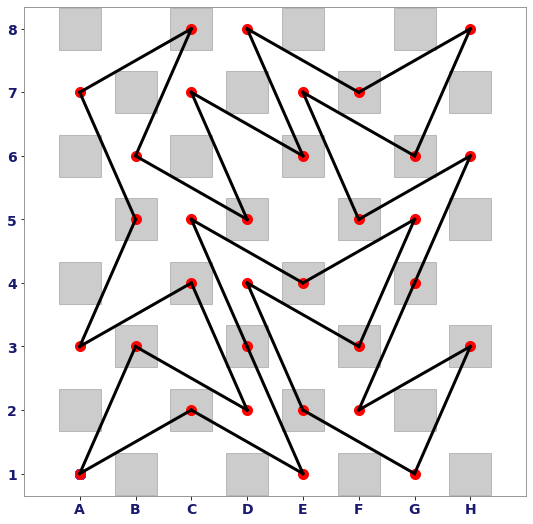

In [9]:
#instance.U[4,5].fix(1)
x=['A','B','C','D','E','F','G','H']
y=['1','2','3','4','5','6','7','8']
#f, ax = plt.subplots(1, 1)


fig=plt.figure(figsize=(9,9))
plt.rc('axes',edgecolor='grey')
#instance = model.create_instance()


for i in range(1,int(sqrt(n))+1):
    for j in range(1,int(sqrt(n))+1):
        if (i+j) % 2==1:
            plt.scatter( i,j,s=1700,marker='s',color='black',alpha=0.2)
        else:
            plt.scatter( i,j,s=1000,marker='s',color='w',alpha=1)   

plt.xticks(range(1,9),x,fontsize=14,c='midnightblue',fontweight='bold')
plt.yticks(range(1,9),fontsize=14,c='midnightblue',fontweight='bold')
#plt.axis('off')
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
#plt.show()
plt.xlim(0,int(sqrt(n))+1)
s = 1
f = 1 
w=0.1
itr=0
plt.scatter([value(instance.Xloc[f])],[value(instance.Yloc[f])], s=100,c='b', marker='X')
contin = True
while contin:    
    for j in instance.j:
        if f!=j and (f,j) in allowed:
            if value(instance.U[f,j])>0.1:
                    itr+=1
                    w+=0.04
                    plt.plot([value(instance.Xloc[f]),value(instance.Xloc[j])],[value(instance.Yloc[f]),value(instance.Yloc[j])], c='k', lw=3 )
                    plt.scatter([value(instance.Xloc[j])],[value(instance.Yloc[j])], s=100,c='r')
                    #plt.scatter([value(instance.Xloc[f])],[value(instance.Yloc[f])], s=100,c='r')
                    plt.savefig('Knight Tour' + str(itr)+ '.png', format='png', dpi=200)
                    f=j
                    print(itr,f,s)
                    if f ==s:
                        contin = False
                        break 

print(value(instance.obj1))